In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Milan\Downloads\rock_density_xray.csv')

In [3]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [10]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [12]:
df.shape

(300, 2)

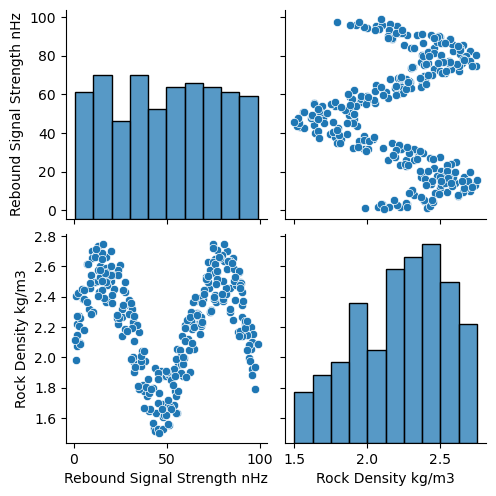

In [13]:
sns.pairplot(df)

In [14]:
df.columns = ['Signal', 'Density']
df.columns

Index(['Signal', 'Density'], dtype='object')

<AxesSubplot:xlabel='Signal', ylabel='Density'>

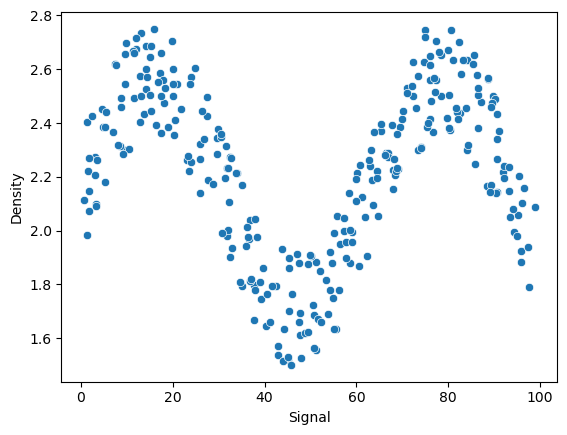

In [15]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [16]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()

In [21]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [24]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [25]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [26]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

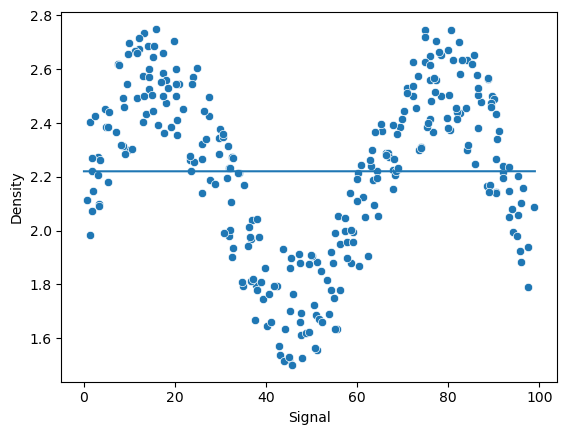

In [27]:
sns.scatterplot(x = 'Signal', y = 'Density', data =df)
plt.plot(signal_range, signal_preds)

In [28]:
def run_model(model, X_train, y_train, X_test, y_test):

    #Fit the model to training dataset
    model.fit(X_train, y_train)
    #performance metric
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae =  mean_absolute_error(y_test, preds)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    # Plot Results Model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))

    sns.scatterplot(x = 'Signal', y = 'Density', data =df, color = 'green')
    plt.plot(signal_range, signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


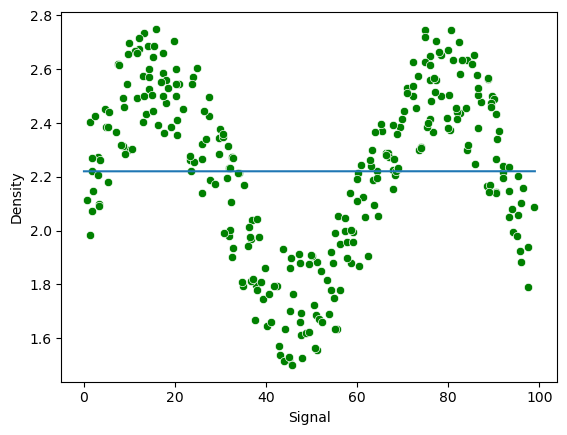

In [29]:
model = LinearRegression() # It is not applicable
run_model(model, X_train, y_train, X_test, y_test)

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()) #It is not performing well

RMSE: 0.2817309563725558
MAE: 0.22903105443511207


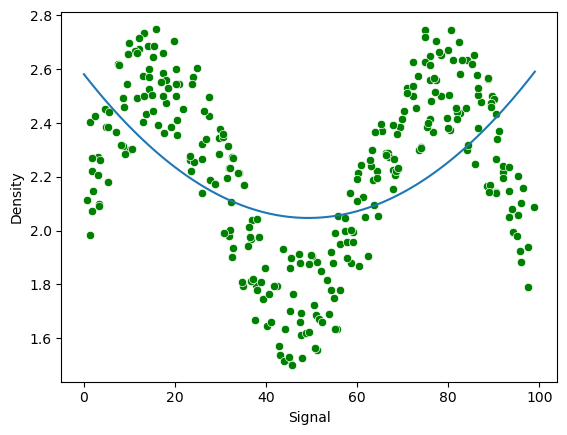

In [32]:
run_model(pipe, X_train, y_train, X_test, y_test )

RMSE: 0.13807525215303348
MAE: 0.1196917134714752


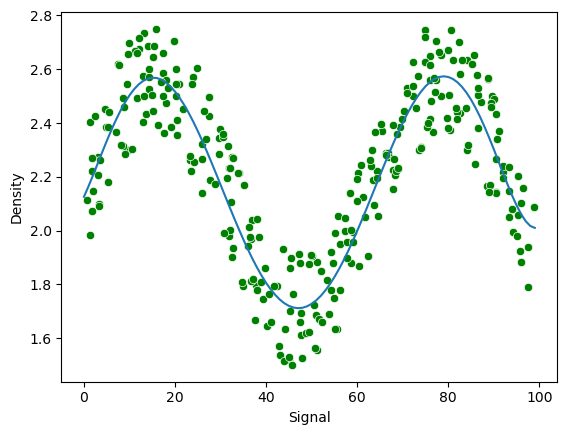

In [33]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression()) #performing well
run_model(pipe, X_train, y_train, X_test, y_test )

# KNeighbors Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


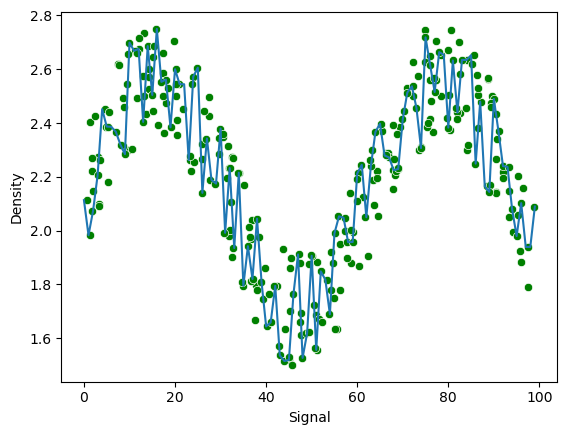

RMSE: 0.13730685016923647
MAE: 0.12198383614100558


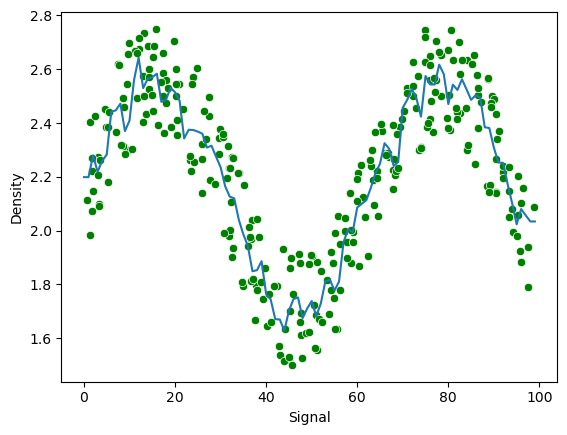

RMSE: 0.13277855732740926
MAE: 0.11635971693292672


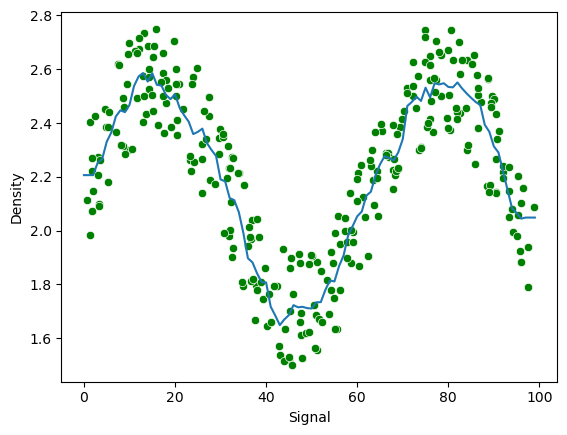

RMSE: 0.15954234753677107
MAE: 0.13363165935705318


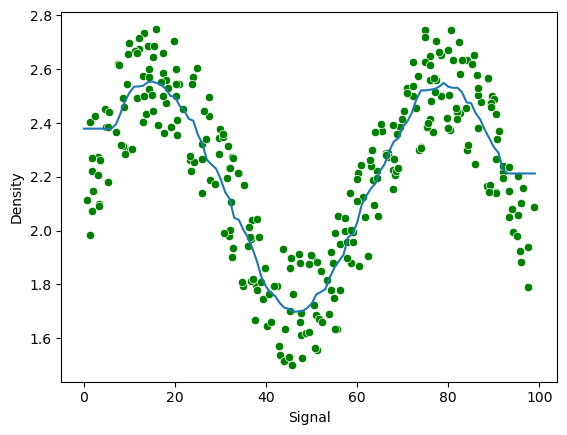

In [35]:
k_values = [1,5,10,30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)
    plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


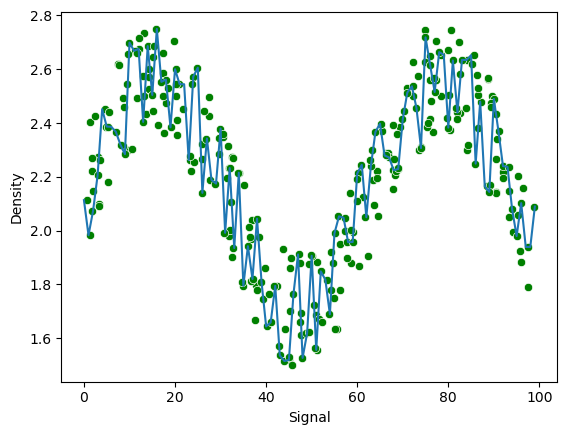

In [37]:
model =  DecisionTreeRegressor() # Not performing well(high variance)
run_model(model, X_train, y_train, X_test, y_test)

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [39]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 100], 'gamma': ['auto', 'scale']}
grid_model = GridSearchCV(svr, param_grid)

RMSE: 0.13015742723601528
MAE: 0.11243103141068958


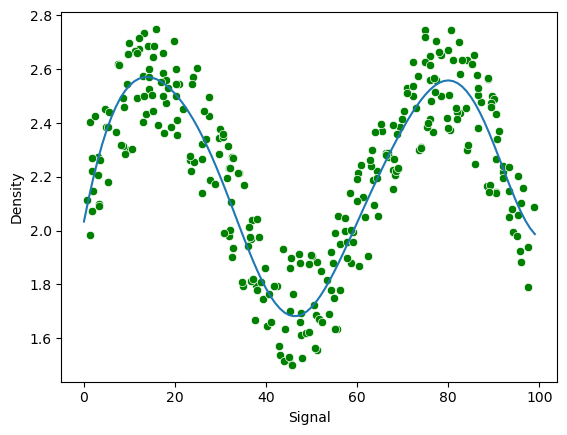

In [40]:
run_model(grid_model, X_train, y_train, X_test, y_test) #Performing well

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor(n_estimators = 10)

RMSE: 0.13881568427397167
MAE: 0.11704087239490922


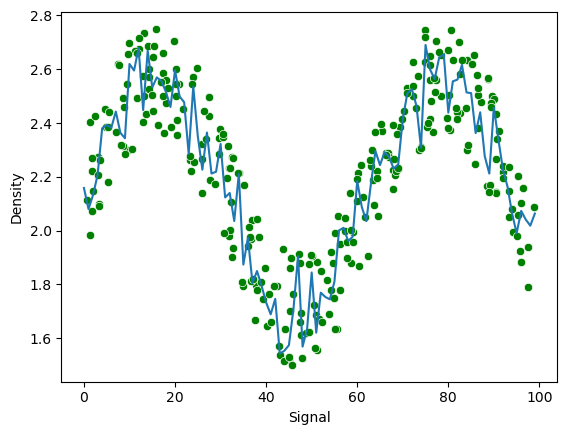

In [43]:
run_model(rf,X_train, y_train, X_test, y_test) #Not performing well

In [45]:

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294051430268009
MAE: 0.11512586742616794


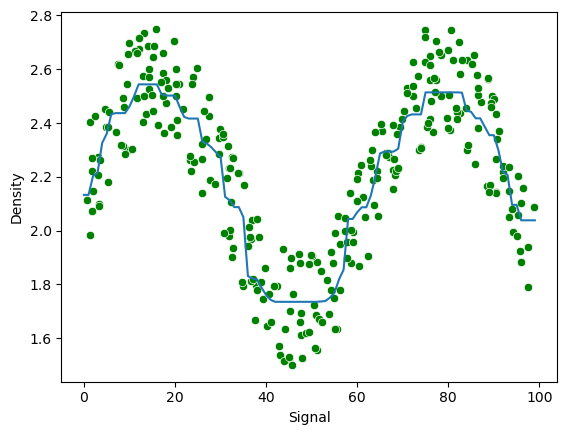

In [46]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)